# Assignment 2 Code Skeleton

This code skeleton is totally optional. You may or may not use this, whichever is easier for you. However, you have to submit the code that can **reproduce your final submission** (highest score) in Kaggle.

You can use this skeleton code by making a copy of this file (File > Save a copy ...), and run this either in your drive with Google Colab or locally in your computer with Jupyter Notebook.

In [189]:
'''
# If you wish to run this on Google Colab, mount the Google drive by running this cell or click the `files` icon on the left navbar
# and click mount Google Drive (it takes some time to load)
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/My Drive/<The path to this notebook in your Google Drive>"
!cd "/content/drive/My Drive/<The path to this notebook in your Google Drive>"
'''

'\n# If you wish to run this on Google Colab, mount the Google drive by running this cell or click the `files` icon on the left navbar\n# and click mount Google Drive (it takes some time to load)\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\n%cd "/content/drive/My Drive/<The path to this notebook in your Google Drive>"\n!cd "/content/drive/My Drive/<The path to this notebook in your Google Drive>"\n'

In [2]:
# these libraries are optional, but might be helpful
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hurin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hurin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hurin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hurin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<h3>Baseline Model</h3>

In [3]:
# Baseline model

# load the data
train = pd.read_csv('train.csv')
X_train = train['Text']
y_train = train['Verdict']

X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the BoW Vectorizer
bow_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))

# Fit and transform the training data, and transform the testing data
X_training_bow = bow_vectorizer.fit_transform(X_training)
X_validation_bow = bow_vectorizer.transform(X_validation)

# train your model
# initialise classifier
lr_model = LogisticRegression(max_iter=200)  # Increasing max_iter for convergence

#train model
lr_model.fit(X_training_bow, y_training)

# predict on validation set
y_prediction = lr_model.predict(X_validation_bow)

# Evaluate the model
print(classification_report(y_validation, y_prediction))

f1_score(y_validation, y_prediction, average='macro')

              precision    recall  f1-score   support

          -1       0.79      0.91      0.85      2926
           0       0.42      0.23      0.30       502
           1       0.67      0.54      0.60      1073

    accuracy                           0.75      4501
   macro avg       0.63      0.56      0.58      4501
weighted avg       0.72      0.75      0.73      4501



0.5823454482230352

In [5]:
# Baseline model

# get the prediction for the test set
test = pd.read_csv('test.csv')
X_test = test['Text']

X_test_bow = bow_vectorizer.transform(X_test)

result = lr_model.predict(X_test_bow)

test['Verdict'] = pd.Series(result)
test.drop(columns=['Text'], inplace=True)
test.to_csv('A0233573E_Logistic_Regression.csv', index=False)

<h3>Data Exploration</h3>

In [3]:
# load the data
train = pd.read_csv('train.csv')
X_train = train['Text']
y_train = train['Verdict']

# Display the distribution of the verdicts
verdict_counts = train['Verdict'].value_counts()

verdict_counts

Verdict
-1    14685
 1     5413
 0     2403
Name: count, dtype: int64

In [4]:
# Calculate length of each sentence
train['Sentence Length'] = train['Text'].apply(lambda x: len(x.split()))

# Calculate the median sentence length for each verdict category
median_sentence_length = train.groupby('Verdict')['Sentence Length'].median()

print(median_sentence_length)

Verdict
-1    13.0
 0    13.0
 1    19.0
Name: Sentence Length, dtype: float64


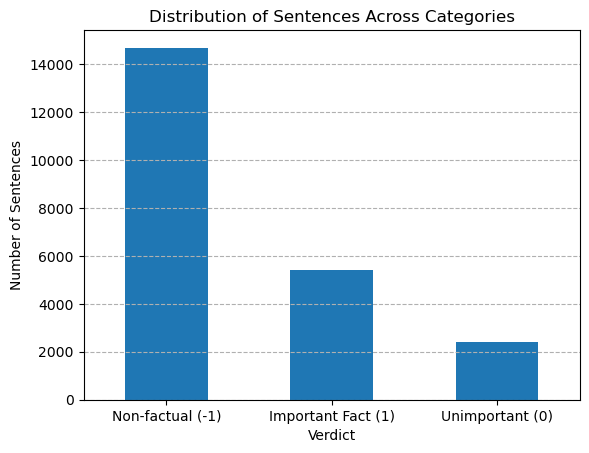

In [5]:
# Generate a bar graph for the verdict counts
verdict_counts.plot(kind='bar')
plt.title('Distribution of Sentences Across Categories')
plt.xlabel('Verdict')
plt.ylabel('Number of Sentences')
plt.xticks(ticks=[0, 1, 2], labels=['Non-factual (-1)', 'Important Fact (1)', 'Unimportant (0)'], rotation=0)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [13]:
# Find all instances of duplicate sentences
duplicates = train[train.duplicated('Text', keep=False)]

# Sort the duplicates based on the text for easier comparison
duplicates_sorted = duplicates.sort_values('Text')

duplicates_sorted.to_csv('duplicates_analysis.csv', index=False)

duplicates_sorted

,Sentence_id,Text,Verdict,Sentence Length
16538,16539,#NAME?,-1,1
566,567,#NAME?,-1,1
16631,16632,#NAME?,-1,1
17133,17134,#NAME?,-1,1
5165,5166,#NAME?,-1,1
...,...,...,...,...
21262,21263,Why didn't you do it?,-1,5
859,860,"Yes, I'd be glad to.",-1,5
9751,9752,"Yes, I'd be glad to.",-1,5
53,54,"You know, we have five percent of the world's ...",1,13


In [15]:
duplicate_sentences_with_diff_labels = train.groupby('Text').filter(lambda x: x['Verdict'].nunique() > 1)

duplicate_sentences_with_diff_labels_sorted = duplicate_sentences_with_diff_labels.sort_values(by='Text')

duplicate_sentences_with_diff_labels_sorted.to_csv('duplicate sentences with different labels.csv', index=False)

duplicate_sentences_with_diff_labels_sorted

,Sentence_id,Text,Verdict,Sentence Length
20,21,Here we are with a government that's been deal...,1,14
40,41,Here we are with a government that's been deal...,0,14
19877,19878,I do not say that.,1,5
19879,19880,I do not say that.,-1,5
18924,18925,That will not help us compete with China.,-1,8
18926,18927,That will not help us compete with China.,1,8
10348,10349,These appointments are for life.,0,5
10349,10350,These appointments are for life.,-1,5
12434,12435,We are better off than we were four years ago.,1,10
13322,13323,We are better off than we were four years ago.,-1,10


<h3> The following is my attempt to play around with the data for Logistic Regression. It is not very systematic but it gives me a better idea on how different methods work. </h3>

In [191]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming/Lemmatization
    # For stemming
    # stemmer = PorterStemmer()
    # stemmed = [stemmer.stem(word) for word in tokens]
    # For lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Re-join tokens into a single string
    preprocessed_text = ' '.join(lemmatized)
    
    return preprocessed_text


In [ ]:
# Apply the pre-processing function to each text in the dataset
X_train_preprocessed = X_train.apply(preprocess_text)
print (X_train_preprocessed)

In [193]:
'''
# DONT RUN THIS
# Attempt 1 in removing frequent and uncommon words

all_preprocessed_tokens = ' '.join(X_train_preprocessed).split()
word_counts = Counter(all_preprocessed_tokens)

# Convert to a DataFrame for easy manipulation
word_counts_dataframe = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

threshold_frequent = 0.8
threshold_rare = 0.02

# Identify frequent and rare words based on your criteria, e.g.,
frequent_words = word_counts_dataframe[word_counts_dataframe['frequency'] > threshold_frequent].word.tolist()
rare_words = word_counts_dataframe[word_counts_dataframe['frequency'] < threshold_rare].word.tolist()

# Filter out frequent and rare words
'''

"\n# DONT RUN THIS\n# Attempt 1 in removing frequent and uncommon words\n\nall_preprocessed_tokens = ' '.join(X_train_preprocessed).split()\nword_counts = Counter(all_preprocessed_tokens)\n\n# Convert to a DataFrame for easy manipulation\nword_counts_dataframe = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])\n\nthreshold_frequent = 0.8\nthreshold_rare = 0.02\n\n# Identify frequent and rare words based on your criteria, e.g.,\nfrequent_words = word_counts_dataframe[word_counts_dataframe['frequency'] > threshold_frequent].word.tolist()\nrare_words = word_counts_dataframe[word_counts_dataframe['frequency'] < threshold_rare].word.tolist()\n\n# Filter out frequent and rare words\n"

In [194]:
# RUN THIS
# Attempt 2 in removing frequent and uncommon words

# Assuming X_train_preprocessed_tokens is a pandas Series where each document is already preprocessed
word_counts = Counter()

X_train_preprocessed.apply(lambda doc: word_counts.update(set(doc.split())))

# Normalize by the total number of documents to get document frequency
total_documents = len(X_train_preprocessed)
word_frequencies = {word: count / total_documents for word, count in word_counts.items()}

threshold_frequent = 1
threshold_rare = 0.0009

frequent_words = [word for word, freq in word_frequencies.items() if freq > threshold_frequent]
rare_words = [word for word, freq in word_frequencies.items() if freq < threshold_rare]

def filter_words(doc):
    tokens = doc.split()
    filtered_tokens = [token for token in tokens if token not in frequent_words and token not in rare_words]
    return ' '.join(filtered_tokens)

X_train_preprocessed_filtered = X_train_preprocessed.apply(filter_words)
print(X_train_preprocessed_filtered)


0                                    think weve seen value
1                                       think nation thing
2                   even seems talk drug think thats wrong
3        weve seen value one thing think term cause val...
4          got away got feeling value free education thing
                               ...                        
22496                                             get shot
22497                                              ever 10
22498    shes done talk get vote come back say well see...
22499    going make america strong going make america g...
22500                   take four year obama thats get get
Name: Text, Length: 22501, dtype: object


In [195]:
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform your preprocessed text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_preprocessed_filtered)  # Assuming X_train_preprocessed is your cleaned text

# Convert the sparse matrix to a dense matrix
X_train_tfidf_dense = X_train_tfidf.toarray()

In [196]:
# Apply sentiment analysis on ORIGINAL TEXT

'''
# Assuming 'X_train_preprocessed' is your preprocessed text column
train['sentiment_polarity'] = train['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
train['sentiment_subjectivity'] = train['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Extract sentiment features
sentiment_features = train[['sentiment_polarity', 'sentiment_subjectivity']].values
'''

"\n# Assuming 'X_train_preprocessed' is your preprocessed text column\ntrain['sentiment_polarity'] = train['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)\ntrain['sentiment_subjectivity'] = train['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)\n\n# Extract sentiment features\nsentiment_features = train[['sentiment_polarity', 'sentiment_subjectivity']].values\n"

In [197]:

# Apply sentiment analysis on PREPROCESSED TEXT

train['sentiment_polarity'] = X_train_preprocessed_filtered.apply(lambda x: TextBlob(x).sentiment.polarity)
train['sentiment_subjectivity'] = X_train_preprocessed_filtered.apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Extract sentiment features
sentiment_features_textblob = train[['sentiment_polarity', 'sentiment_subjectivity']].values


In [198]:
# Apply VADER sentiment analysis
sia = SentimentIntensityAnalyzer()
def analyze_sentiment_vader(text):
    # Return a dictionary containing the scores for positive, negative, neutral, and compound
    return sia.polarity_scores(text)

train['vader_positive'] = train['Text'].apply(lambda x: analyze_sentiment_vader(x)['pos'])
train['vader_negative'] = train['Text'].apply(lambda x: analyze_sentiment_vader(x)['neg'])
train['vader_neutral'] = train['Text'].apply(lambda x: analyze_sentiment_vader(x)['neu'])
train['vader_compound'] = train['Text'].apply(lambda x: analyze_sentiment_vader(x)['compound'])

vader_features = train[['vader_positive', 'vader_negative', 'vader_neutral', 'vader_compound']].values

In [199]:
# Apply analysis on formal reporting language
fact_checking_keywords = ['studies show', 'research finds', 'evidence suggests', 'scientists say', 'data shows']

def keyword_presence(doc, keywords):
    return [1 if keyword in doc else 0 for keyword in keywords]

# Assuming X_train_preprocessed_filtered is your preprocessed and filtered text pandas Series
keyword_features = X_train_preprocessed_filtered.apply(lambda doc: keyword_presence(doc, fact_checking_keywords))

# Convert the list of lists into a numpy array for easier manipulation
keyword_features_array = np.array(keyword_features.tolist())

In [200]:
# Concatenate the TF-IDF features with the sentiment features
# X_train_combined = np.hstack([X_train_tfidf_dense, sentiment_features])
# X_train_combined = X_train_tfidf_dense
# X_train_combined = sentiment_features

# Assuming X_train_tfidf_dense is your TF-IDF features and sentiment_features are your sentiment analysis features
# X_train_combined = np.hstack([X_train_tfidf_dense, sentiment_features_textblob, vader_features, keyword_features_array])
X_train_combined = np.hstack([X_train_tfidf_dense, vader_features])

train.to_csv('Tests Sentiment.csv', index=False)

In [201]:
# Split the training data
# 20% of the data is set aside for validation

print(X_train_combined.shape)  # Should show two dimensions
print(len(y_train))  # Should match the first dimension of X_train_combined

X_training, X_validation, y_training, y_validation = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

(22501, 1372)
22501


In [202]:
# train your model
# initialise classifier
model = LogisticRegression(max_iter=200)  # Increasing max_iter for convergence

#train model
model.fit(X_training, y_training)

# predict on validation set
y_prediction = model.predict(X_validation)

In [203]:
# get the training error
f1_score(y_validation, y_prediction, average='macro')

0.5689057093442415

In [204]:
# Evaluate the model
print(classification_report(y_validation, y_prediction))

              precision    recall  f1-score   support

          -1       0.79      0.93      0.85      2926
           0       0.49      0.18      0.26       502
           1       0.67      0.54      0.60      1073

    accuracy                           0.75      4501
   macro avg       0.65      0.55      0.57      4501
weighted avg       0.73      0.75      0.72      4501



In [205]:
# get the prediction for the test set
test = pd.read_csv('test.csv')
X_test = test['Text']

# preprocess the test set
X_test_preprocessed = X_test.apply(preprocess_text)


word_counts = Counter()

X_test_preprocessed.apply(lambda doc: word_counts.update(set(doc.split())))

# Normalize by the total number of documents to get document frequency
total_documents = len(X_test_preprocessed)
word_frequencies = {word: count / total_documents for word, count in word_counts.items()}

threshold_frequent = 1
threshold_rare = 0.0009

frequent_words = [word for word, freq in word_frequencies.items() if freq > threshold_frequent]
rare_words = [word for word, freq in word_frequencies.items() if freq < threshold_rare]

def filter_words(doc):
    tokens = doc.split()
    filtered_tokens = [token for token in tokens if token not in frequent_words and token not in rare_words]
    return ' '.join(filtered_tokens)

X_test_preprocessed_filtered = X_test_preprocessed.apply(filter_words)



# Fit and transform your preprocessed text data
X_test_tfidf = tfidf_vectorizer.transform(X_test_preprocessed_filtered)

# Convert the sparse matrix to a dense matrix
X_test_tfidf_dense = X_test_tfidf.toarray()


# Apply sentiment analysis on ORIGINAL TEXT

test['sentiment_polarity'] = test['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['sentiment_subjectivity'] = test['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Extract sentiment features
sentiment_features = test[['sentiment_polarity', 'sentiment_subjectivity']].values


# Concatenate the TF-IDF features with the sentiment features
# X_test_combined = np.hstack([X_test_tfidf_dense, sentiment_features])
# X_test_combined = X_test_tfidf_dense
X_test_combined = sentiment_features

print(X_test_combined.shape)  # Should show two dimensions


result = model.predict(X_test_combined)

(1032, 2)


ValueError: X has 2 features, but LogisticRegression is expecting 1372 features as input.

In [ ]:
test['Verdict'] = pd.Series(result)
test.drop(columns=['Text'], inplace=True)
test.drop(columns=['sentiment_polarity'], inplace=True)
test.drop(columns=['sentiment_subjectivity'], inplace=True)
test.to_csv('A0233573E.csv', index=False)